# WordCloud and top N-grams Notebook

Author:
- Reinaldo Augusto

Status:
- DONE

Goal:
- Do a preliminar text analysis, making a Wordcloud and a function that calculates thr top N-grams.

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import nltk 
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

## Importing the dataset

In this notebook, we will use only a sample of our final data.

In [1]:
from util import agg_jsonls  # helper function
from pprint import pprint

reviewsRA = agg_jsonls(".")
print(f"We have a total of {len(reviewsRA)}!")
pprint(reviewsRA[0])

We have a total of 282!
{'business_name': 'Tok&Stok - Loja Online ',
 'city': 'Embu das Artes',
 'datetime': '2020-03-26T12:48:00Z',
 'description': 'Realizei uma compra de produtos Natalinos pelo site.Quando '
                'chegou, nao constavam na caixa todos os itens encomendados, '
                'porem constam na nota e foram cobrados.Entrei em contato com '
                'o SAC diversas vezes  para resolver o problema, mas nao tive '
                'sucesso, pois alegam que na losgistica consta envio de tudo, '
                'conforme o ultimo protocolo de número 682136.Quero que '
                'resolvam esse problema, ja faz tempo!Ou enviam os produtos ou '
                'devolvam o valor.',
 'responses': {'business': [], 'customer': [], 'final': {}},
 'review_ID': '102002173',
 'tags': ['Outro problema', 'Outro Tipo de produto/Serviço', 'Decoração'],
 'timeCaptured': '2020-03-27T12:08:11Z',
 'title': 'Paguei e nao recebi',
 'uf': 'SP'}


In [3]:
# Transforming the json file into a DataFrame
reviews = pd.DataFrame(reviewsRA)

## Creating a WordCloud

Firstly, we will create a WordCloud without further text processing and see what we have as a result. We probably will have a lot of stopwords being placed on our result.

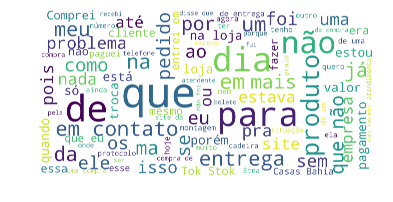

In [5]:
word_cloud_text = ' '.join(reviews['description'])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As shown in the WordCloud above, the most common words that appeared were stop words, such as "que", "de" and "para". These words doesn't carry any specific meaning, so we should take them out of our analysis.

In [6]:
# Importing the portuguese stop words and taking them out of the reviews.
stop_words = set(stopwords.words("portuguese"))
without_stop_words = []
stopword = []
sentence = word_cloud_text
words = nltk.word_tokenize(sentence)
for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

Now, our reviews don't have these type of words and we can make a WordCloud which has more meanings to our analysis.

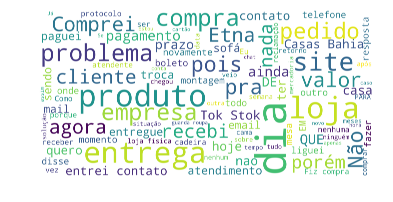

In [7]:
word_cloud_text_SW = ' '.join(without_stop_words)

wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text_SW)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Analysing the WordCloud above, we see that it makes sense to our business problem. In the result, we see words such as "entrega"($i.e$ delivery), "problema" ($i.e$ problem), "pedido" ($i.e$ order) and other words that are connected with the business problem.

## Making a top N-grams function

Now, we will head to another NLP text processing, which is called N-grams. This code below creates a function that returns the top N-grams we define in our data.

In [9]:
def top_k_ngrams(word_tokens,n,k):
    # Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))
    # Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

Let's use our data without the stop words to have a better result and see what are the top 1-grams.

In [10]:
word_tokens = nltk.word_tokenize(word_cloud_text_SW)
top_k_ngrams(word_tokens,1,10)

[(',', 1911), ('.', 1058), ('dia', 364), ('!', 327), ('entrega', 212), ('loja', 208), ('contato', 196), ('compra', 181), ('produto', 161), (')', 160)]


We see a lot of punctuations in the first positions and some words that makes sense based on our context. And now let's see what happens with the top 2-grams:

In [11]:
top_k_ngrams(word_tokens,2,10)

[('! !', 135), ('. No', 60), (', porém', 51), (', pois', 49), ('No dia', 49), ('. A', 46), ('R $', 46), ('? ?', 44), ('. Comprei', 44), ('. Não', 40)]


We also see a lot of punctuation and less interpretation can be done in this one. This means that we need to make further text processing in the next stages of our project.